Import Important Libraries:

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import chi2_contingency
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import joblib
import warnings

warnings.filterwarnings('ignore')



## About Data:

The Obesity risk dataset contains 20758 rows and 18 columns.  


The columns are as follows :  

- **ID**: Unique identifier for each individual.  
- **Gender**: The biological sex of the individual (Male/Female).  
- **Age**: The age of the individual in years.  
- **Height**: The height of the individual.  
- **Weight**: The weight of the individual.  
- **family_history_with_overweight**: Indicates whether the individual has a family history of overweight (Yes/No).  
- **FAVC**: Indicates whether the individual frequently consumes high-calorie food (Yes/No).  
- **FCVC**: The frequency of vegetable consumption, on a scale from 1 (low) to 3 (high).  
- **NCP**: The number of main meals consumed per day.  
- **CAEC**: Frequency of eating between meals (Never, Sometimes, Frequently, Always).  
- **SMOKE**: Indicates whether the individual smokes (Yes/No).  
- **CH2O**: Daily water intake in liters.  
- **SCC**: Indicates whether the individual has a history of calorie consumption monitoring (Yes/No).  
- **FAF**: Physical activity frequency per week, on a scale from 0 (none) to 3 (high).  
- **TUE**: The time spent using electronic devices per day, on a scale from 0 (low) to 2 (high).  
- **CALC**: Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).  
- **MTRANS**: The main mode of transportation used (Public_Transportation, Walking, etc...).  
- **NObeyesdad**: target column indicate Obesity type of the individual (Normal Weight, Overweight type II, etc...)

### Exploring the data

## Data Loading and Initial Exploration

In [ ]:
df=pd.read_csv('train.csv')
df

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 18 columns]

## Displaying the first few rows

In [ ]:
df.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

## Checking data types and non-null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

## Checking for duplicate rows

In [ ]:
df.duplicated().sum()

np.int64(0)

## Descriptive statistics for numerical features

In [ ]:
df.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

## Descriptive statistics for categorical features

In [ ]:
df.describe(include='object')

Gender family_history_with_overweight   FAVC       CAEC  SMOKE    SCC  \
count    20758                          20758  20758      20758  20758  20758   
unique       2                              2      2          4      2      2   
top     Female                            yes    yes  Sometimes     no     no   
freq     10422                          17014  18982      17529  20513  20071   

             CALC                 MTRANS        NObeyesdad  
count       20758                  20758             20758  
unique          3                      5                 7  
top     Sometimes  Public_Transportation  Obesity_Type_III  
freq        15066                  16687              4046

## Value counts for categorical features

In [ ]:
cols=df.select_dtypes('object')
for col in cols:
  print(f'Values of {col}:')
  print(df[col].value_counts())
  print('--------------------------------------------')

Values of Gender:
Gender
Female    10422
Male      10336
Name: count, dtype: int64
--------------------------------------------
Values of family_history_with_overweight:
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
--------------------------------------------
Values of FAVC:
FAVC
yes    18982
no      1776
Name: count, dtype: int64
--------------------------------------------
Values of CAEC:
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
--------------------------------------------
Values of SMOKE:
SMOKE
no     20513
yes      245
Name: count, dtype: int64
--------------------------------------------
Values of SCC:
SCC
no     20071
yes      687
Name: count, dtype: int64
--------------------------------------------
Values of CALC:
CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64
--------------------------------------------
Values of MTRANS:
MTRANS

## Exploratory Data Analysis (EDA)

### Age Distribution

In [ ]:
fig_box=px.box(df,x='Age',title='Age Distribution')
fig_box.show()

### Age Distribution Histogram

In [ ]:
fig = px.histogram(df, x="Age", title="Age Distribution")
fig.show()

### Gender Distribution

In [ ]:
fig_pie = px.pie(names=df['Gender'].value_counts().index, values=df['Gender'].value_counts(), title='Gender Distribution')
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()

### Family History of Overweight Distribution

In [ ]:
fig_bar1 = px.bar(
    x=df['family_history_with_overweight'].value_counts().index, y=df['family_history_with_overweight'].value_counts(),
    title='Obesity History',
    labels={'x': 'Family History', 'y': 'Freq'},
    color_continuous_scale='viridis',
    text=df['family_history_with_overweight'].value_counts()
)

fig_bar1.update_traces(texttemplate='%{text:,.000f}', textposition='outside')
fig_bar1.update_layout(showlegend=False,height=800)
fig_bar1.show()

### Smoker Distribution

In [ ]:
fig_bar1 = px.bar(
    x=df['SMOKE'].value_counts().index, y=df['SMOKE'].value_counts(),
    title='Smoker Distribution',
    labels={'x': 'Smoker', 'y': 'Freq'},
    text=df['SMOKE'].value_counts()
)

fig_bar1.update_traces(texttemplate='%{text:,.000f}', textposition='outside')
fig_bar1.update_layout(showlegend=False,height=800)
fig_bar1.show()

### Obesity Types Distribution

In [ ]:
fig_bar1 = px.bar(
    x=df['NObeyesdad'].value_counts().index, y=df['NObeyesdad'].value_counts(),
    title='Obesity Types Distribution',
    labels={'x': 'Obesity Type', 'y': 'Freq'},
    text=df['NObeyesdad'].value_counts()
)

fig_bar1.update_traces(texttemplate='%{text:,.000f}', textposition='outside')
fig_bar1.update_layout(showlegend=False,height=800)
fig_bar1.show()

### Transportation Types Distribution

In [ ]:
fig_bar1 = px.bar(
    x=df['MTRANS'].value_counts().index, y=df['MTRANS'].value_counts(),
    title='Transportation Types Distribution',
    labels={'x': 'Transportation Type', 'y': 'Freq'},
    text=df['MTRANS'].value_counts()
)

fig_bar1.update_traces(texttemplate='%{text:,.000f}', textposition='outside')
fig_bar1.update_layout(showlegend=False,height=800)
fig_bar1.show()

### High-Calorie Food Consumption Distribution

In [ ]:
fig_bar1 = px.bar(
    x=df['FAVC'].value_counts().index, y=df['FAVC'].value_counts(),
    title='High-Calorie food Consumtion Distribution',
    labels={'x': 'High-Calorie food Consumtion', 'y': 'Freq'},
    text=df['FAVC'].value_counts()
)

fig_bar1.update_traces(texttemplate='%{text:,.000f}', textposition='outside')
fig_bar1.update_layout(showlegend=False,height=800)
fig_bar1.show()

### Vegetable Consumption Distribution

In [ ]:
fig = px.histogram(df, x="FCVC", title="Vegetable Consumtion Distribution")
fig.show()

### Number of Meals Distribution

In [ ]:
fig = px.histogram(df, x="NCP", title="Number of Meals Distribution")
fig.show()

### Eating Between Meals Distribution

In [ ]:
fig_bar1 = px.bar(
    x=df['CAEC'].value_counts().index, y=df['CAEC'].value_counts(),
    title='Eating Between Meals Distribution',
    labels={'x': 'Eating Between Meals', 'y': 'Freq'},
    text=df['CAEC'].value_counts()
)

fig_bar1.update_traces(texttemplate='%{text:,.000f}', textposition='outside')
fig_bar1.update_layout(showlegend=False,height=800)
fig_bar1.show()

### Water Intake Distribution (Liters)

In [ ]:
fig = px.histogram(df, x="CH2O", title="Number Water Intake Distribution (Liters)")
fig.show()

### Calorie Consumption Monitoring Distribution

In [ ]:
fig_bar1 = px.bar(
    x=df['SCC'].value_counts().index, y=df['SCC'].value_counts(),
    title='Calorie Consumtion Monitoring Distribution',
    labels={'x': 'Calorie Consumtion Monitoring', 'y': 'Freq'},
    text=df['SCC'].value_counts()
)

fig_bar1.update_traces(texttemplate='%{text:,.000f}', textposition='outside')
fig_bar1.update_layout(showlegend=False,height=800)
fig_bar1.show()

### Physical Activity Per Week Distribution

In [ ]:
fig = px.histogram(df, x="FAF", title="Physical Activity Per week Distribution")
fig.show()

### Time Spent Using Electronic Devices Distribution

In [ ]:
fig = px.histogram(df, x="TUE", title="Time Spent Using Electronic devices Distribution")
fig.show()

### Alcohol Consumption Distribution

In [ ]:
fig = px.histogram(df, x="CALC", title="Alcohol Consumtion Distribution")
fig.show()

## Relationship between features and Obesity Type

### Age Distribution by Gender

In [ ]:
fig = go.Figure()

# Male histogram
fig.add_trace(go.Histogram(
    x=df[df['Gender'] == 'Male']['Age'],
    nbinsx=15,
    name='Male',
    marker_color='steelblue',
    opacity=0.75,
    xaxis='x1',
    yaxis='y1'
))

# Female histogram
fig.add_trace(go.Histogram(
    x=df[df['Gender'] == 'Female']['Age'],
    nbinsx=15,
    name='Female',
    marker_color='purple',
    opacity=0.75,
    xaxis='x2',
    yaxis='y1'  # share the same y-axis
))

# Update layout to mimic subplots
fig.update_layout(
    title_text='Age Distribution by Gender',
    barmode='overlay',
    xaxis=dict(domain=[0, 0.48], title='Age (Male)'),
    xaxis2=dict(domain=[0.52, 1.0], title='Age (Female)'),
    yaxis=dict(title='Freq'),
    legend=dict(x=0.8, y=0.95),
    bargap=0.1,
    width=900,
    height=500
)

fig.show()

### Obesity Types Gender Distribution

In [ ]:
fig = px.histogram(
    df,
    x='NObeyesdad',
    color='Gender',
    barmode='group',
    title='Obesity Types Gender Distribution',
    color_discrete_map={'Male': 'lightblue', 'Female': 'pink'}
)

fig.update_layout(
    xaxis_title='Obesity Types',
    yaxis_title='Freq',
    xaxis_tickangle=45,
    bargap=0.2,
    width=900,
    height=500
)

fig.show()

### Number of meals and Obesity Type relation

In [ ]:
fig_violin=px.violin(df,x='NObeyesdad',y='NCP',
                     title='Number of meals and Obesity Type relation',
                     box=True,color='NObeyesdad')
fig_violin.update_layout(
    xaxis_title='Obesity',
    yaxis_title='Number of meals',
    legend_title='Obesity',
    height=600,
    width=900
)
fig_violin.show()

### Calorie Consumption Monitoring Grouped by Obesity Type

In [ ]:
grouped_counts = df.groupby(['FAVC', 'NObeyesdad']).size().reset_index(name='Count')
fig = px.bar(
    grouped_counts,
    x='FAVC',
    y='Count',
    color='NObeyesdad',
    barmode='group',
    title='Calorie Consumption Monitoring Grouped by Obesity Type',
    labels={'FAVC': 'High-Calorie Food Consumption', 'Count': 'Frequency', 'NObeyesdad': 'Obesity Type'},
    text='Count',
    height=600)

fig.update_layout(
    xaxis_title='Consumes High-Calorie Food',
    yaxis_title='Frequency',
    bargap=0.2)

fig.show()

### Transportation type vs. obesity

In [ ]:
fig = px.histogram(
    df,
    x='MTRANS',
    color='NObeyesdad',
    barmode='group',
    title='Transportation type vs. obesity' ,
    labels={'MTRANS':'Transportation type', 'count': 'Count', 'NObeyesdad': 'Target'},
)

# Optional: Update layout
fig.update_layout(
    xaxis_title='Transportation type',
    yaxis_title='Count',
    legend_title='Obesity',
    height=600,
    width=900
)

fig.show()

### Distribution of Water Intake by Obesity

In [ ]:
fig = px.histogram(
    df,
    x='CH2O',
    color='NObeyesdad',
    barmode='overlay',
    opacity=0.6,
    title='Distribution of Water Intake by Obesity',
    labels={
        'CH2O': 'Water Intake',
        'count': 'Frequency',
        'NObeyesdad': 'Obesity Type'
    },
)

# Layout tweaks
fig.update_layout(
    xaxis_title='Water Intake',
    yaxis_title='Frequency',
    legend_title='Obesity Type',
    height=600,
    width=900
)

fig.show()

### Distribution of Physical activity by Obesity

In [ ]:
fig = px.histogram(
    df,
    x='FAF',
    color='NObeyesdad',
    barmode='overlay',
    opacity=0.6,
    title='Distribution of Physical activity by Obesity',
    labels={
        'FAF': 'Physical activity',
        'count': 'Frequency',
        'NObeyesdad': 'Obesity Type'
    },
)

# Layout tweaks
fig.update_layout(
    xaxis_title='Physical activity',
    yaxis_title='Frequency',
    legend_title='Obesity Type',
    height=600,
    width=900
)

fig.show()

### Eating between Meals vs. obesity

In [ ]:
fig = px.histogram(
    df,
    x='CAEC',
    color='NObeyesdad',
    barmode='group',
    title='Eating between Meals vs. obesity' ,
    labels={'CAEC':'Eating between Meals', 'count': 'Count', 'NObeyesdad': 'Target'},
)

# Optional: Update layout
fig.update_layout(
    xaxis_title='Eating between Meals',
    yaxis_title='Count',
    legend_title='Obesity',
    height=600,
    width=900
)

fig.show()

### History Of Calorie Consumption vs. obesity

In [ ]:
fig = px.histogram(
    df,
    x='SCC',
    color='NObeyesdad',
    barmode='group',
    title='History Of Calorie Assumtion vs. obesity' ,
    labels={'SCC':'History Of Calorie Assumtion', 'count': 'Count', 'NObeyesdad': 'Target'},
)

# Optional: Update layout
fig.update_layout(
    xaxis_title='History Of Calorie Assumtion',
    yaxis_title='Count',
    legend_title='Obesity',
    height=600,
    width=900
)

fig.show()

### Alcohol Consumption vs. obesity

In [ ]:
fig = px.histogram(
    df,
    x='CALC',
    color='NObeyesdad',
    barmode='group',
    title='Alcohol Assumtion vs. obesity' ,
    labels={'CALC':'Alcohol Assumtion', 'count': 'Count', 'NObeyesdad': 'Target'},
)

# Optional: Update layout
fig.update_layout(
    xaxis_title='Alcohol Assumtion',
    yaxis_title='Count',
    legend_title='Obesity',
    height=600,
    width=900
)

fig.show()

### Use of Electronic devices by Obesity

In [ ]:
fig = px.histogram(
    df,
    x='TUE',
    color='NObeyesdad',
    barmode='overlay',
    opacity=0.6,
    title='Use of Electronic devices by Obesity',
    labels={
        'TUE': 'Use of Electronic devices',
        'count': 'Frequency',
        'NObeyesdad': 'Obesity Type'
    },
)

# Layout tweaks
fig.update_layout(
    xaxis_title='Use of Electronic devices',
    yaxis_title='Frequency',
    legend_title='Obesity Type',
    height=600,
    width=900
)

fig.show()

## Feature Engineering

In [ ]:
# Add BMI as a new feature
df = df.copy()
df['BMI'] = (df['Weight'] / (df['Height'] ** 2)).round(2)

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((confusion_matrix.shape[1]-1)*(confusion_matrix.shape[0]-1))/(n-1))
    rcorr = confusion_matrix.shape[0] - ((confusion_matrix.shape[0]-1)**2)/(n-1)
    kcorr = confusion_matrix.shape[1] - ((confusion_matrix.shape[1]-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))) if min((kcorr-1), (rcorr-1)) > 0 else np.nan

# Get categorical columns (excluding NObeyesdad)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'NObeyesdad' in categorical_cols:
    categorical_cols.remove('NObeyesdad')

cramer_results = []
for col in categorical_cols:
    ct = pd.crosstab(df[col], df['NObeyesdad'])
    cv = cramers_v(ct)
    cramer_results.append({'Feature': col, 'CramersV': cv})

cramer_df = pd.DataFrame(cramer_results).sort_values('CramersV', ascending=False)
print("\nCramer's V Results (Feature Association with Target):")
print(cramer_df)


Cramer's V Results (Feature Association with Target):
                          Feature  CramersV
0                          Gender  0.618786
1  family_history_with_overweight  0.556025
3                            CAEC  0.332392
6                            CALC  0.310457
2                            FAVC  0.273056
5                             SCC  0.221545
7                          MTRANS  0.167355
4                           SMOKE  0.100656


## Data Preprocessing

In [ ]:
#  Preprocessing: Encode Target
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])
target_classes = le.classes_
print("Target classes:", target_classes)

# Convert categorical values to lowercase
for col in categorical_cols:
    df[col] = df[col].str.lower()

# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# Drop target and id
X = df.drop(columns=['NObeyesdad', 'id'], errors='ignore')
y = df['NObeyesdad']

print(f"Features shape: {X.shape}")

# %%
# Mutual Information
mi = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi}).sort_values('MI', ascending=False)
print("Top 10 features by Mutual Information:")
print(mi_df.head(10))


Target classes: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']
Features shape: (20758, 23)
Top 10 features by Mutual Information:
       Feature        MI
8          BMI  1.388286
2       Weight  1.368936
0          Age  0.797157
1       Height  0.777181
5         CH2O  0.529923
3         FCVC  0.502915
7          TUE  0.489834
6          FAF  0.458481
9  Gender_male  0.254757
4          NCP  0.209449


## Splitting Data and Scaling

In [ ]:


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# %%
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f"Training set after SMOTE: {X_train_res.shape}")

# %%
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# %%
# Save feature names for Streamlit app compatibility
feature_names = X_train_res.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')
print("Feature names saved. Sample:", feature_names[:5])

Training set after SMOTE: (22659, 23)
Feature names saved. Sample: ['Age', 'Height', 'Weight', 'FCVC', 'NCP']


## Model Training and Evaluation

In [ ]:
# Train baseline models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}

for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'Accuracy: {acc:.4f}')
    print(classification_report(y_test, y_pred, target_names=target_classes))


Training Logistic Regression...
Accuracy: 0.8709
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.95      0.92       505
      Normal_Weight       0.88      0.80      0.84       617
     Obesity_Type_I       0.82      0.84      0.83       582
    Obesity_Type_II       0.94      0.96      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.73      0.74      0.74       485
Overweight_Level_II       0.74      0.71      0.73       504

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152


Training Random Forest...
Accuracy: 0.9025
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.94       505
      Normal_Weight       0.87      0.89      0.88       617
     Obesity_Type_I       0.88      0.88      0.

## Hyperparameter Tuning and Cross-Validation

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=500, random_state=42),
        'params': {'C': [0.1, 1, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [10, 20]}
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        'params': {'n_estimators': [100, 500], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 6]}
    }
}

best_models = {}
best_score = 0
best_model = None
best_name = None

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for name, config in param_grids.items():
    print(f'\nTuning {name}...')
    grid = GridSearchCV(config['model'], config['params'], cv=cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train_res)
    
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    print(f'Best Params: {grid.best_params_}')
    print(f'Test Accuracy: {acc:.4f}')
    
    if acc > best_score:
        best_score = acc
        best_model = grid.best_estimator_
        best_name = name

print(f'\nBest Model: {best_name} with Accuracy: {best_score:.4f}')

# Save best model
joblib.dump(best_model, 'best_model.pkl')
print('Best model saved as best_model.pkl')


Tuning Logistic Regression...
Best Params: {'C': 10}
Test Accuracy: 0.8714

Tuning Random Forest...
Best Params: {'max_depth': 20, 'n_estimators': 200}
Test Accuracy: 0.9044

Tuning XGBoost...
Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}
Test Accuracy: 0.9085

Best Model: XGBoost with Accuracy: 0.9085
Best model saved as best_model.pkl


## ROC AUC Analysis

The ROC AUC curves show the performance of each model for each obesity class. A higher AUC indicates better performance.

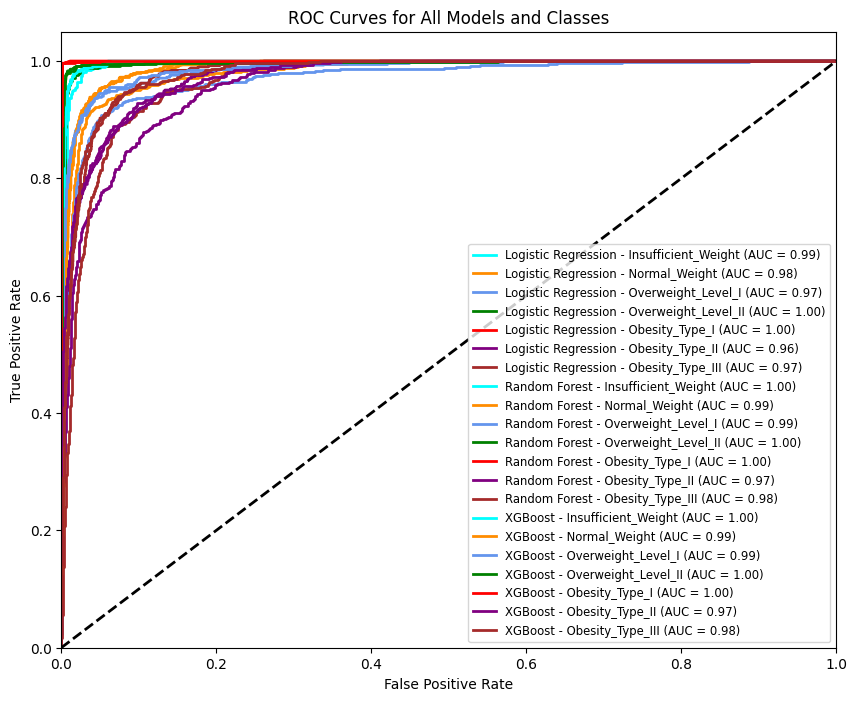

In [ ]:
# ROC-AUC Analysis for multiclass
class_names_clean = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

y_test_bin = label_binarize(y_test, classes=range(len(class_names_clean)))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test_scaled)
        for i, color in zip(range(n_classes), colors):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2,
                     label=f'{name} - {class_names_clean[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models and Classes')
plt.legend(loc='lower right', fontsize='small')
plt.show()

In [ ]:
# Final check: Load saved feature names
saved_features = joblib.load('feature_names.pkl')
print('Number of saved features:', len(saved_features))
print('First 10 features:', saved_features[:10])

Number of saved features: 23
First 10 features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'Gender_male']


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px

# -----------------------------------------------------------------------------
# App Title and Description
# -----------------------------------------------------------------------------
st.title("🫀 Obesity Level Predictor")
st.markdown("Enter your lifestyle and physical details to predict your obesity risk level.")

# -----------------------------------------------------------------------------
# Load Models and Artifacts (Cached for performance)
# -----------------------------------------------------------------------------
@st.cache_resource
def load_models():
    try:
        model = joblib.load("best_model.pkl")
        scaler = joblib.load("scaler.pkl")
        feature_names = joblib.load("feature_names.pkl")
        return model, scaler, feature_names
    except FileNotFoundError as e:
        st.error(f"❌ Model file not found: {e.filename}. Make sure it's in the current directory.")
        st.stop()
    except Exception as e:
        st.error(f"❌ Error loading models: {str(e)}")
        st.stop()

model, scaler, feature_names = load_models()

# Class names must match those used during training
class_names = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# -----------------------------------------------------------------------------
# User Input Form (Two-column layout)
# -----------------------------------------------------------------------------
with st.form("prediction_form"):
    st.subheader("👤 Your Information")

    col1, col2 = st.columns(2)

    with col1:
        age = st.number_input("Age (years)", min_value=10, max_value=90, value=25)
        height = st.number_input("Height (meters)", min_value=1.0, max_value=2.5, value=1.70)
        weight = st.number_input("Weight (kg)", min_value=30, max_value=200, value=70)
        gender = st.radio("Gender", ["Male", "Female"])
        family_history = st.radio("Family history of overweight?", ["no", "yes"])
        favc = st.radio("Frequently eats high-calorie food?", ["no", "yes"])
        fcvc = st.slider("Vegetable consumption frequency (1-3)", 1, 3, 2)
        ncp = st.number_input("Number of main meals per day", min_value=1, max_value=5, value=3)

    with col2:
        caec = st.selectbox("Eating between meals", ["no", "Sometimes", "Frequently", "Always"])
        smoke = st.radio("Do you smoke?", ["no", "yes"])
        ch2o = st.number_input("Daily water intake (liters)", min_value=0.5, max_value=4.0, value=2.0)
        scc = st.radio("Do you monitor calorie intake?", ["no", "yes"])
        faf = st.number_input("Physical activity frequency (days/week)", min_value=0, max_value=7, value=2)
        tue = st.slider("Time using electronic devices (scale 0-2)", 0, 2, 1)
        calc = st.selectbox("Alcohol consumption", ["no", "Sometimes", "Frequently", "Always"])
        mtrans = st.selectbox(
            "Main mode of transportation",
            ["Automobile", "Bike", "Motorbike", "Public_Transportation", "Walking"]
        )

    submitted = st.form_submit_button("🔮 Predict Obesity Level")

# -----------------------------------------------------------------------------
# Prediction Logic
# -----------------------------------------------------------------------------
if submitted:
    # Calculate BMI
    bmi = round(weight / (height ** 2), 2)
    st.write(f"📏 **Your BMI:** {bmi} (kg/m²)")

    # Prepare input data with correct one-hot encoding (lowercase matching)
    input_data = pd.DataFrame({
        "Gender_Male": [1 if gender == "Male" else 0],
        "family_history_with_overweight_yes": [1 if family_history == "yes" else 0],
        "FAVC_yes": [1 if favc == "yes" else 0],
        "SMOKE_yes": [1 if smoke == "yes" else 0],
        "SCC_yes": [1 if scc == "yes" else 0],
        "CAEC_Always": [1 if caec == "Always" else 0],
        "CAEC_Frequently": [1 if caec == "Frequently" else 0],
        "CAEC_Sometimes": [1 if caec == "Sometimes" else 0],
        "CALC_Always": [1 if calc == "Always" else 0],
        "CALC_Frequently": [1 if calc == "Frequently" else 0],
        "CALC_Sometimes": [1 if calc == "Sometimes" else 0],
        "MTRANS_Bike": [1 if mtrans == "Bike" else 0],
        "MTRANS_Motorbike": [1 if mtrans == "Motorbike" else 0],
        "MTRANS_Public_Transportation": [1 if mtrans == "Public_Transportation" else 0],
        "MTRANS_Walking": [1 if mtrans == "Walking" else 0],
        "Age": [age],
        "Height": [height],
        "Weight": [weight],
        "FCVC": [fcvc],
        "NCP": [ncp],
        "CH2O": [ch2o],
        "FAF": [faf],
        "TUE": [tue],
        "BMI": [bmi]
    })

    # Ensure column order and add missing columns as 0
    input_data = input_data.reindex(columns=feature_names, fill_value=0)

    # Scale the input
    try:
        input_scaled = scaler.transform(input_data)
    except Exception as e:
        st.error(f"❌ Error during scaling: {e}")
        st.stop()

    # Make prediction
    try:
        prediction = model.predict(input_scaled)[0]
        probabilities = model.predict_proba(input_scaled)[0]
        confidence = probabilities.max()
        predicted_class = class_names[prediction]

        # -----------------------------------------------------------------------------
        # Display Results
        # -----------------------------------------------------------------------------
        st.markdown("---")
        st.subheader("📊 Prediction Result")
        st.success(f"**Obesity Level:** {predicted_class}")
        st.info(f"**Confidence Score:** {confidence:.2%}")

        # Show probability distribution
        prob_df = pd.DataFrame({
            "Obesity Level": class_names,
            "Probability": probabilities
        })
        fig = px.bar(
            prob_df,
            x="Obesity Level",
            y="Probability",
            color="Probability",
            color_continuous_scale="Blues",
            title="Prediction Confidence per Class"
        )
        fig.update_layout(showlegend=False, height=400)
        st.plotly_chart(fig)

        # -----------------------------------------------------------------------------
        # Health Tips
        # -----------------------------------------------------------------------------
        st.markdown("---")
        st.subheader("💡 Health Recommendation")

        if "Normal_Weight" in predicted_class:
            st.balloons()
            st.write("✅ **Great job!** You're in a healthy weight range. Keep up the good habits!")
        elif "Obesity" in predicted_class:
            st.warning("⚠️ High risk detected. Consider increasing physical activity, improving diet, and consulting a nutritionist or doctor.")
        elif "Overweight" in predicted_class:
            st.info("🏋️ You're in the overweight range. Small lifestyle changes can make a big difference. Try walking more and reducing high-calorie snacks.")
        else:
            st.info("🥗 You're underweight. Consider consulting a dietitian to ensure you're getting enough nutrients.")

    except Exception as e:
        st.error(f"❌ Prediction failed: {e}")

Overwriting app.py


In [ ]:
!streamlit run app.py

^C
